# COVID-19
## Analyzing the data of the COVID-19 pandemic

In [1]:
import os
import json
import pickle
import datetime
import numpy as np
import pandas as pd
import urllib.request

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from IPython.display import clear_output, display

In [2]:
out = '.\\out\\'
figsave_format = 'png'
figsave_dpi = 200

axistitlesize = 22
axisticksize = 17
axislabelsize = 26
axislegendsize = 23

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## Load pandemic data

In [3]:
url_cases = (
    'https://raw.githubusercontent.com/' +
    'CSSEGISandData/COVID-19/' +
    'master/' +
    'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
)
url_recov = (
    'https://raw.githubusercontent.com/' +
    'CSSEGISandData/COVID-19/' +
    'master/' +
    'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
)
url_death = (
    'https://raw.githubusercontent.com/' +
    'CSSEGISandData/COVID-19/' +
    'master/' +
    'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
)

In [4]:
# Load .csv formatted datafiles
with urllib.request.urlopen(url_cases) as url:
    data_cases = pd.read_csv(url, sep=',', comment='#', header=0)
with urllib.request.urlopen(url_recov) as url:
    data_recov = pd.read_csv(url, sep=',', comment='#', header=0)
with urllib.request.urlopen(url_death) as url:
    data_death = pd.read_csv(url, sep=',', comment='#', header=0)

In [5]:
dates = np.array(data_cases.columns[4:])
date_jump = 4

## Official number of cases

In [6]:
sum_cases = {}
sum_recov = {}
sum_death = {}

for idx, d in enumerate(dates):
    sum_cases[d] = data_cases[d].values.sum()
    sum_recov[d] = data_recov[d].values.sum()
    sum_death[d] = data_death[d].values.sum()

sum_cases = pd.Series(data=sum_cases)
sum_recov = pd.Series(data=sum_recov)
sum_death = pd.Series(data=sum_death)

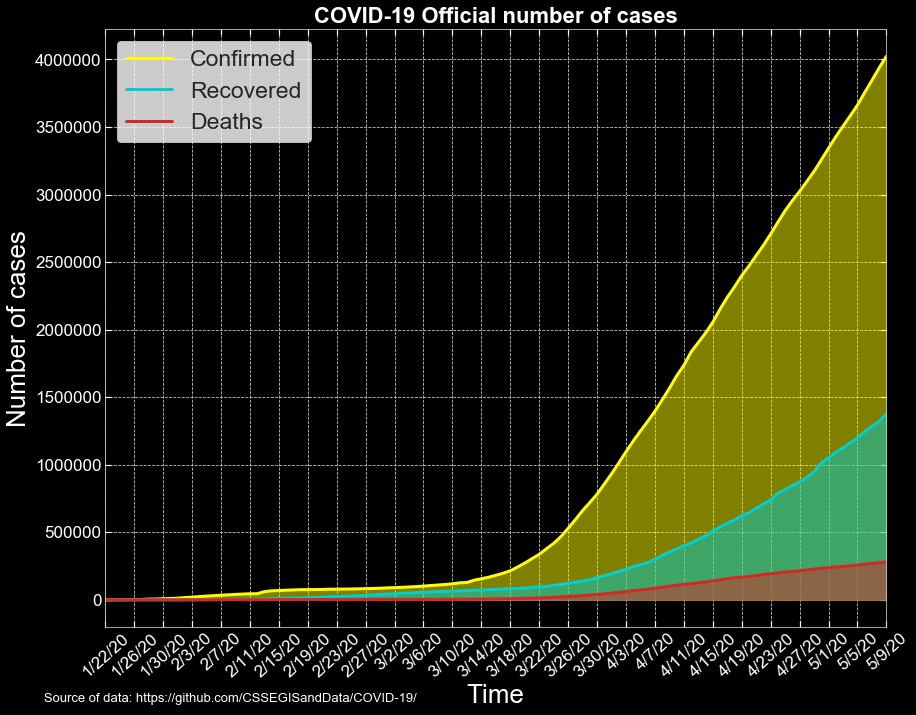

In [7]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                         facecolor='black', subplot_kw=dict(facecolor='black'))

cases_color = 'yellow'
axes.plot(dates, sum_cases, label='Confirmed',
          c=cases_color, lw=3)
axes.fill_between(dates, sum_cases, color=cases_color, alpha=0.5)

recov_color = 'darkturquoise'
axes.plot(dates, sum_recov, label='Recovered',
          c=recov_color, lw=3)
axes.fill_between(dates, sum_recov, color=recov_color, alpha=0.5)

death_color = 'tab:red'
axes.plot(dates, sum_death, label='Deaths',
          c=death_color, lw=3)
axes.fill_between(dates, sum_death, color=death_color, alpha=0.5)

# Source text
axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
          c='white', fontsize=13, fontweight='book',
          horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
          bbox=dict(facecolor='black', alpha=0.2, lw=0))

axes.set_title('COVID-19 Official number of cases', 
               fontsize=axistitlesize, fontweight='bold', color='white')

axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
axes.set_xticks(dates[::date_jump])
axes.set_xticklabels(dates[::date_jump], rotation=42, ha='center')

# Should be placed after setting x-ticks!!!
axes.set_xlim(dates[0], dates[-1])

axes.legend(loc='upper left', fontsize=axislegendsize)

plt.savefig(out + 'time_series.png',
            format=figsave_format, dpi=figsave_dpi,
            pad=5,
            facecolor='black', edgecolor='black')

plt.show()

## Adjusted number of cases

In [8]:
adj_cases = sum_cases['2/13/20'] - sum_cases['2/12/20']
adj_recov = sum_recov['2/13/20'] - sum_recov['2/12/20']
adj_death = sum_death['2/13/20'] - sum_death['2/12/20']

sum_cases_adj = sum_cases.copy()
sum_recov_adj = sum_recov.copy()
sum_death_adj = sum_death.copy()

adj_dates = ['2/8/20','2/9/20','2/10/20','2/11/20','2/12/20'] 
for m, d in enumerate(adj_dates):
    sum_cases_adj[d] += adj_cases * (m+1)/6
    sum_recov_adj[d] += adj_recov * (m+1)/6
    sum_death_adj[d] += adj_death * (m+1)/6

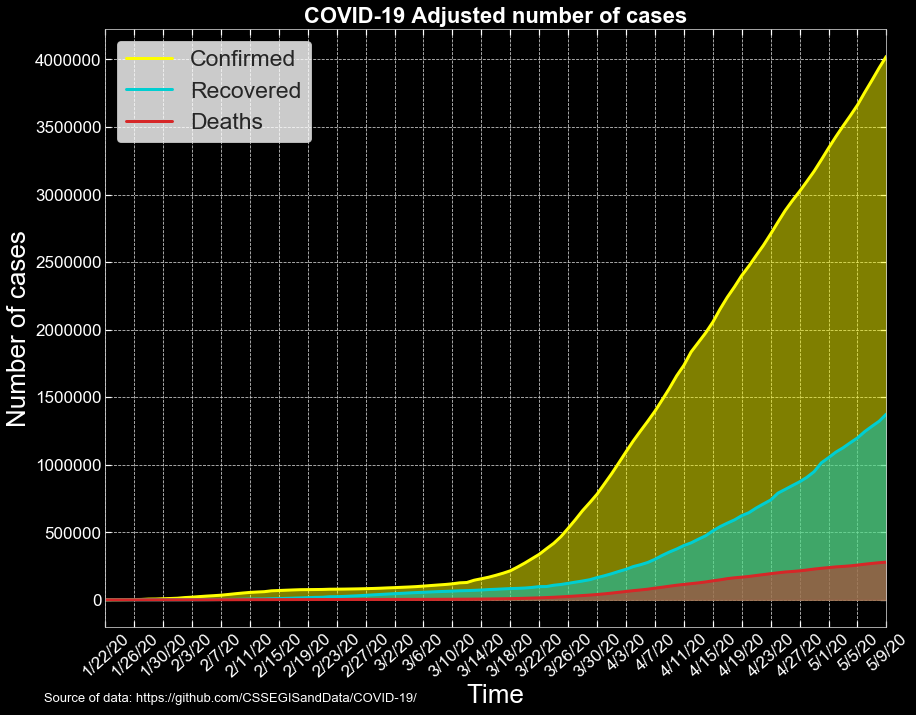

In [9]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                         facecolor='black', subplot_kw=dict(facecolor='black'))

cases_color = 'yellow'
axes.plot(dates, sum_cases_adj, label='Confirmed',
          c=cases_color, lw=3)
axes.fill_between(dates, sum_cases_adj, color=cases_color, alpha=0.5)

recov_color = 'darkturquoise'
axes.plot(dates, sum_recov_adj, label='Recovered',
          c=recov_color, lw=3)
axes.fill_between(dates, sum_recov_adj, color=recov_color, alpha=0.5)

death_color = 'tab:red'
axes.plot(dates, sum_death_adj, label='Deaths',
          c=death_color, lw=3)
axes.fill_between(dates, sum_death_adj, color=death_color, alpha=0.5)

# Source text
axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
          c='white', fontsize=13, fontweight='book',
          horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
          bbox=dict(facecolor='black', alpha=0.2, lw=0))

axes.set_title('COVID-19 Adjusted number of cases', 
               fontsize=axistitlesize, fontweight='bold', color='white')

axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
axes.set_xticks(dates[::date_jump])
axes.set_xticklabels(dates[::date_jump], rotation=42, ha='center')

# Should be placed after setting x-ticks!!!
axes.set_xlim(dates[0], dates[-1])

axes.legend(loc='upper left', fontsize=axislegendsize)

plt.savefig(out + 'time_series_adj.png',
            format=figsave_format, dpi=figsave_dpi,
            facecolor='black', edgecolor='black')

plt.show()

## Cases per country/region

In [10]:
regions = data_cases['Country/Region'].unique()
region_cases = data_cases.groupby(by='Country/Region', group_keys=False)[dates].agg('sum')
region_recov = data_recov.groupby(by='Country/Region', group_keys=False)[dates].agg('sum')
region_death = data_death.groupby(by='Country/Region', group_keys=False)[dates].agg('sum')

In [11]:
regions

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

### World without China

In [12]:
sum_cases_wo_china = sum_cases - region_cases.loc['China']
sum_recov_wo_china = sum_recov - region_recov.loc['China']
sum_death_wo_china = sum_death - region_death.loc['China']

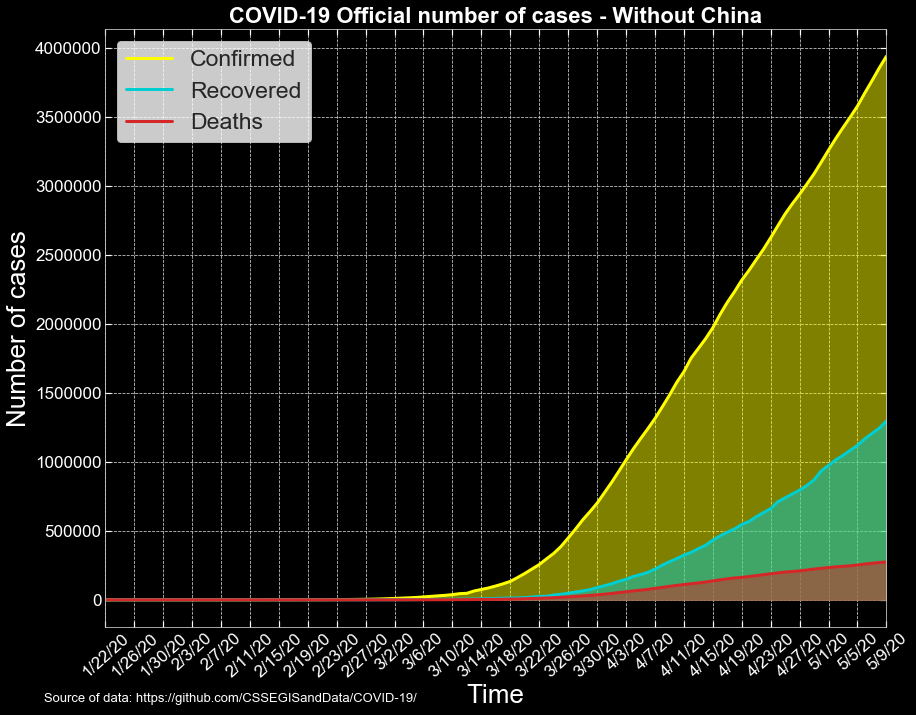

In [13]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                         facecolor='black', subplot_kw=dict(facecolor='black'))

cases_color = 'yellow'
axes.plot(dates, sum_cases_wo_china, label='Confirmed',
          c=cases_color, lw=3)
axes.fill_between(dates, sum_cases_wo_china, color=cases_color, alpha=0.5)

recov_color = 'darkturquoise'
axes.plot(dates, sum_recov_wo_china, label='Recovered',
          c=recov_color, lw=3)
axes.fill_between(dates, sum_recov_wo_china, color=recov_color, alpha=0.5)

death_color = 'tab:red'
axes.plot(dates, sum_death_wo_china, label='Deaths',
          c=death_color, lw=3)
axes.fill_between(dates, sum_death_wo_china, color=death_color, alpha=0.5)

# Source text
axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
          c='white', fontsize=13, fontweight='book',
          horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
          bbox=dict(facecolor='black', alpha=0.2, lw=0))

axes.set_title('COVID-19 Official number of cases - Without China', 
               fontsize=axistitlesize, fontweight='bold', color='white')

axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
axes.set_xticks(dates[::date_jump])
axes.set_xticklabels(dates[::date_jump], rotation=42, ha='center')

# Should be placed after setting x-ticks!!!
axes.set_xlim(dates[0], dates[-1])

axes.legend(loc='upper left', fontsize=axislegendsize)

plt.savefig(out + 'time_series_wo_china.png',
            format=figsave_format, dpi=figsave_dpi,
            pad=5,
            facecolor='black', edgecolor='black')

plt.show()

In [14]:
def plot_region(region, mode='full'):
    
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                             facecolor='black', subplot_kw=dict(facecolor='black'))

    if mode.lower()=='full':
        cases_color = 'yellow'
        axes.plot(dates, region_cases.loc[region], label='Confirmed',
                  c=cases_color, lw=3)
        axes.fill_between(dates, region_cases.loc[region], color=cases_color, alpha=0.5)

        recov_color = 'darkturquoise'
        axes.plot(dates, region_recov.loc[region], label='Recovered',
                  c=recov_color, lw=3)
        axes.fill_between(dates, region_recov.loc[region], color=recov_color, alpha=0.5)

        death_color = 'tab:red'
        axes.plot(dates, region_death.loc[region], label='Deaths',
                  c=death_color, lw=3)
        axes.fill_between(dates, region_death.loc[region], color=death_color, alpha=0.5)
        
        axes.set_title('COVID-19 Official number of historical cases - {}'.format(region), 
                   fontsize=axistitlesize, fontweight='bold', color='white')

    elif mode.lower()=='total':
        cases_color = 'yellow'
        region_total = region_cases.loc[region] - region_recov.loc[region] - region_death.loc[region]
        axes.plot(dates, region_total, label='Active total',
                  c=cases_color, lw=3)
        axes.fill_between(dates, region_total, color=cases_color, alpha=0.5)
        
        axes.set_title('COVID-19 Official number of active cases - {}'.format(region), 
                   fontsize=axistitlesize, fontweight='bold', color='white')
    
    elif mode.lower()=='daily':
        cases_color = 'yellow'
        region_daily = np.zeros_like(region_cases.loc[region])
        
        # Set starting day value
        region_daily[0] = 0
        for i in range(len(region_cases.loc[region][1:])):
            now = region_cases.loc[region][i+1]
            prev = region_cases.loc[region][i]
            
            region_daily[i+1] = now - prev
            
        axes.plot(dates, region_daily, label='Daily',
              c=cases_color, lw=3)
        axes.fill_between(dates, region_daily, color=cases_color, alpha=0.5)

        axes.set_title('COVID-19 Official number of daily cases - {}'.format(region), 
                   fontsize=axistitlesize, fontweight='bold', color='white')
        
    
    else:
        raise AttributeError('Modes should be \'total\' or \'full\'')
        
    # Source text
    axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
              c='white', fontsize=13, fontweight='book',
              horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
              bbox=dict(facecolor='black', alpha=0.2, lw=0))

    axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
    axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

    axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    axes.set_xticks(dates[::date_jump])
    axes.set_xticklabels(dates[::date_jump], rotation=42, ha='center')

    # Should be placed after setting x-ticks!!!
    axes.set_xlim(dates[0], dates[-1])

    axes.legend(loc='upper left', fontsize=axislegendsize)

    plt.savefig(out + 'time_series_{0}_{1}.png'.format(region.lower().replace(' ', ''), mode.lower()),
                format=figsave_format, dpi=figsave_dpi,
                pad=5,
                facecolor='black', edgecolor='black')

    plt.show()

### Mainland China

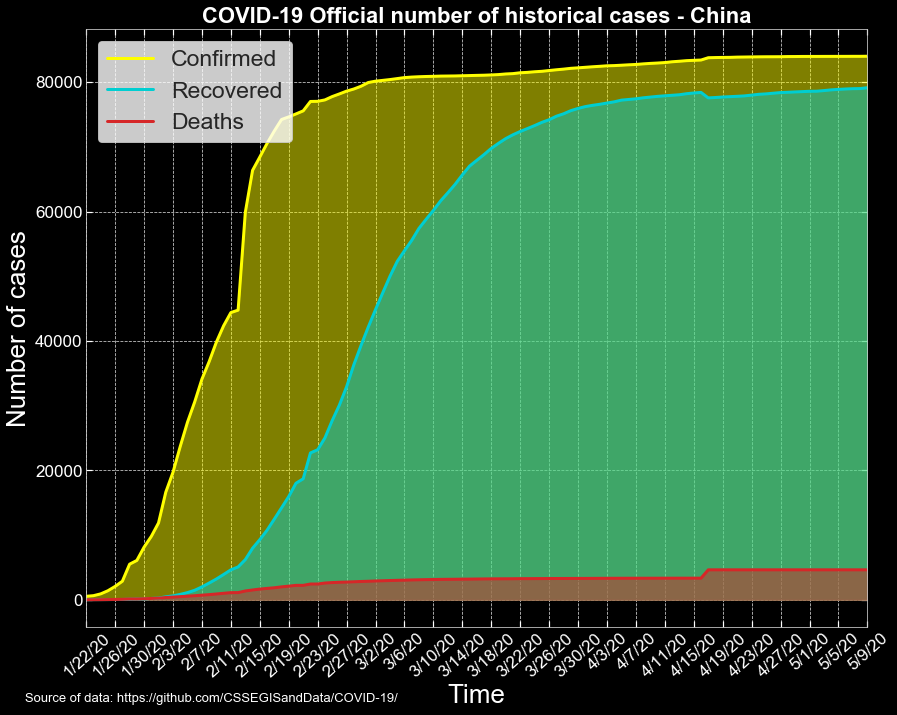

In [15]:
plot_region(region='China', mode='full')

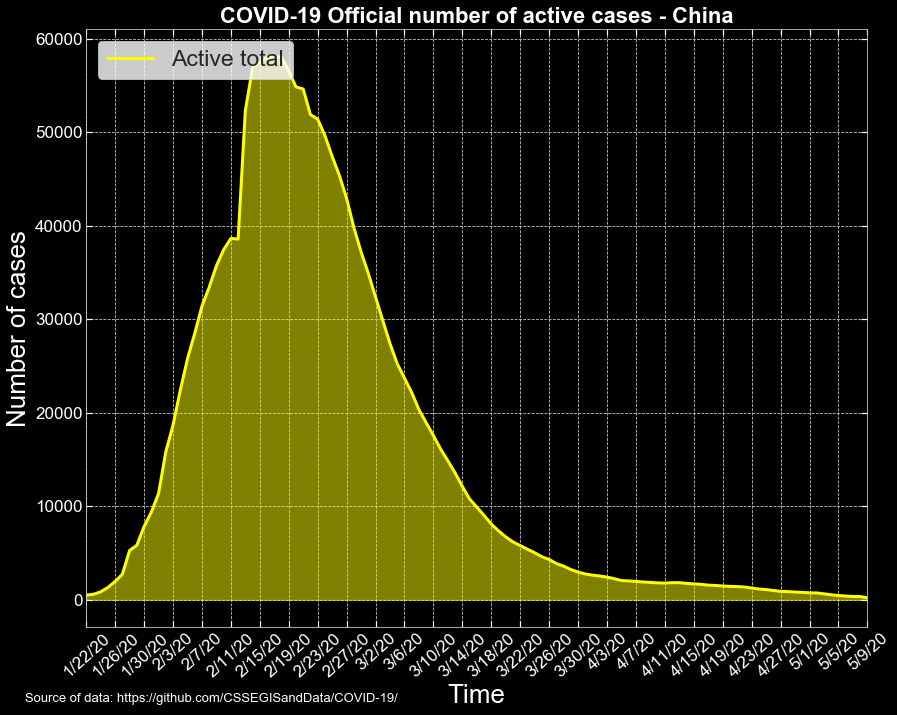

In [16]:
plot_region(region='China', mode='total')

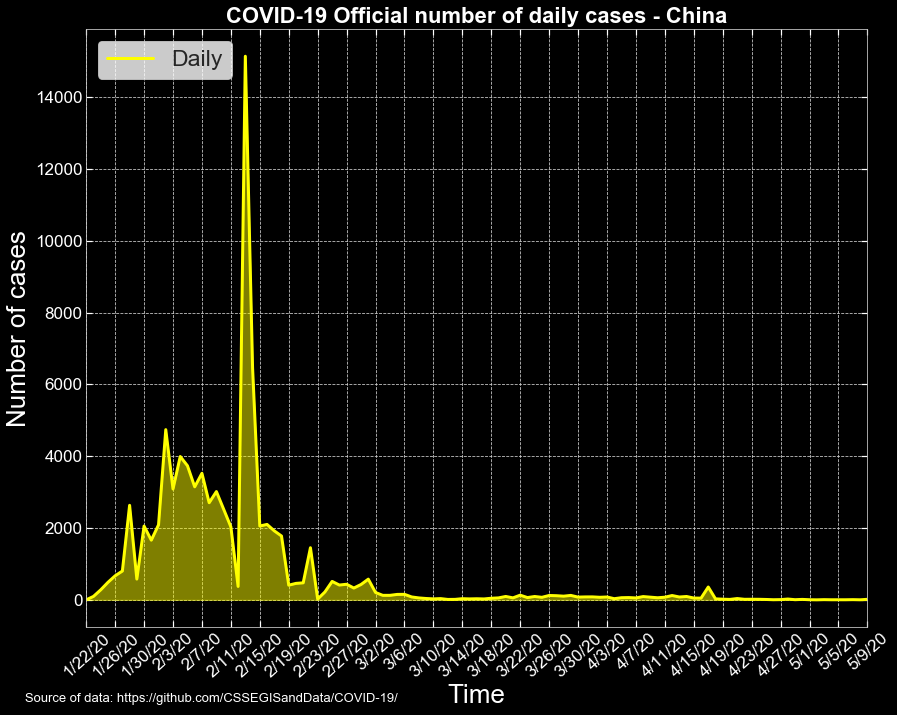

In [17]:
plot_region(region='China', mode='daily')

### South Korea

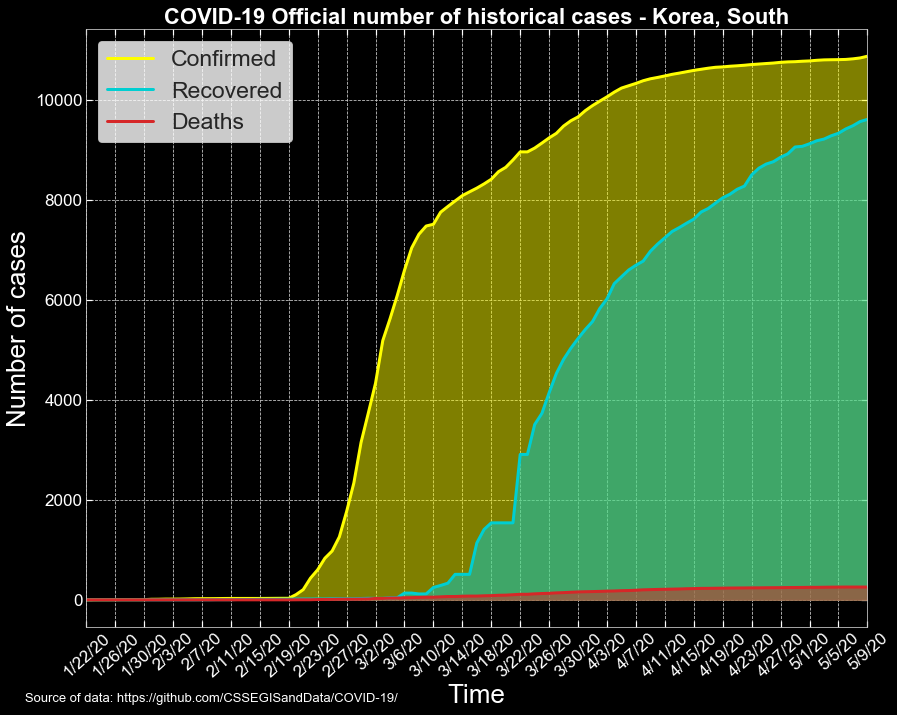

In [18]:
plot_region(region='Korea, South', mode='full')

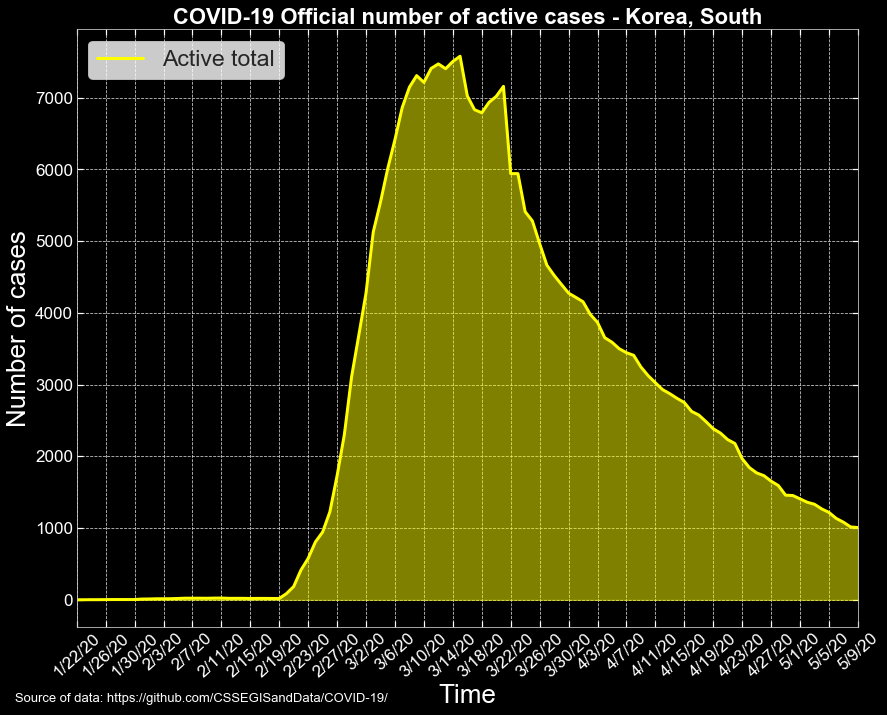

In [19]:
plot_region(region='Korea, South', mode='total')

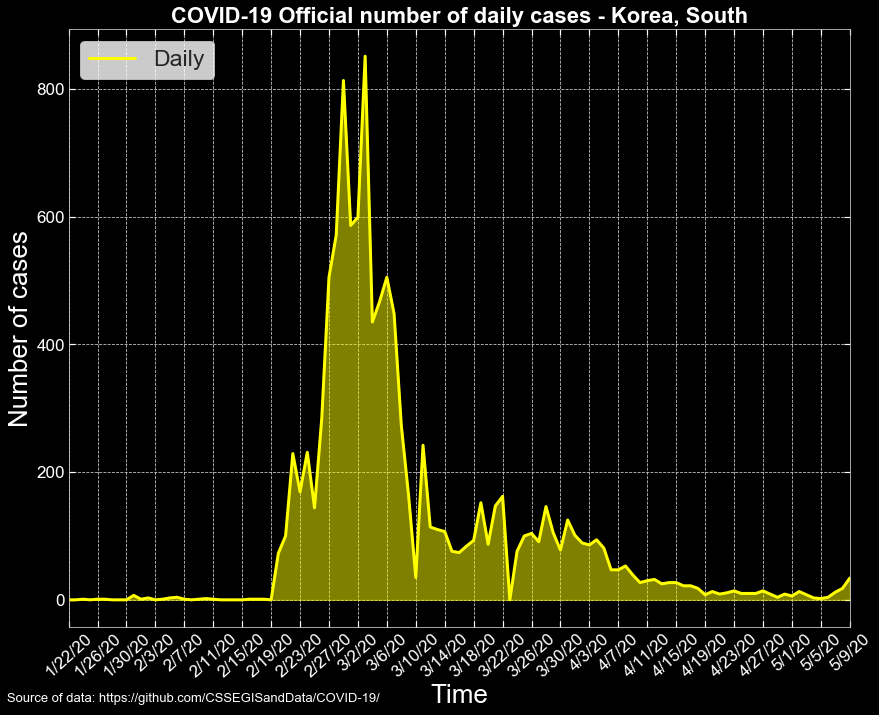

In [20]:
plot_region(region='Korea, South', mode='daily')

### Iran

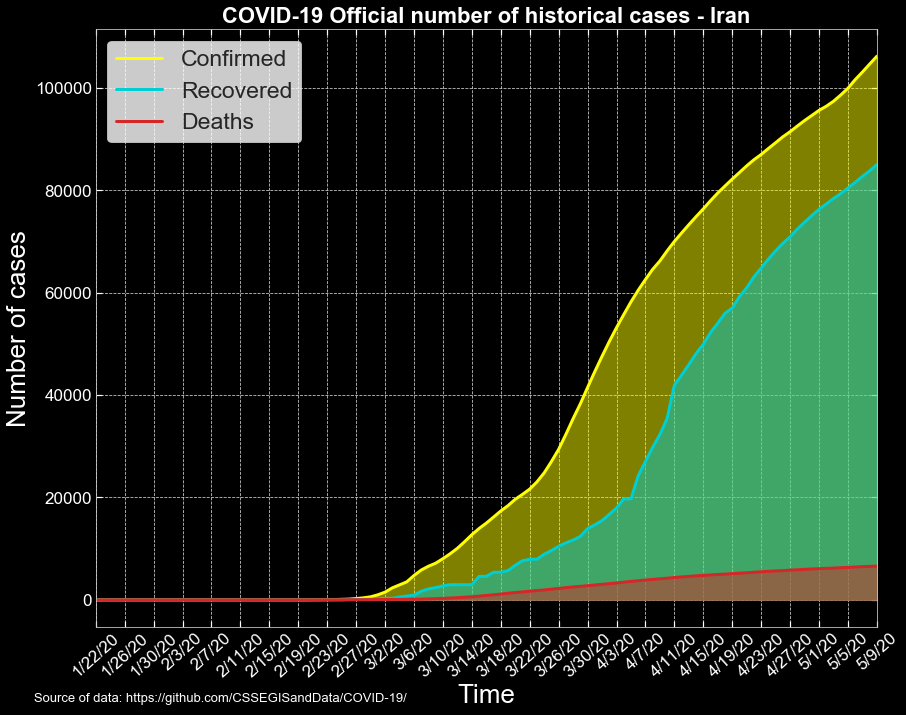

In [21]:
plot_region(region='Iran', mode='full')

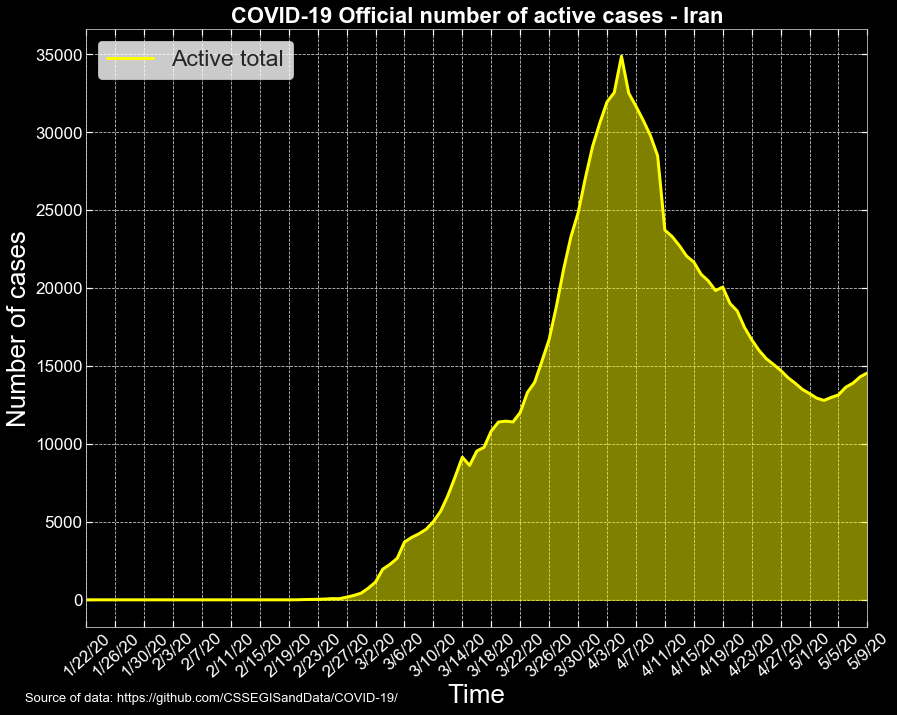

In [22]:
plot_region(region='Iran', mode='total')

### Italy

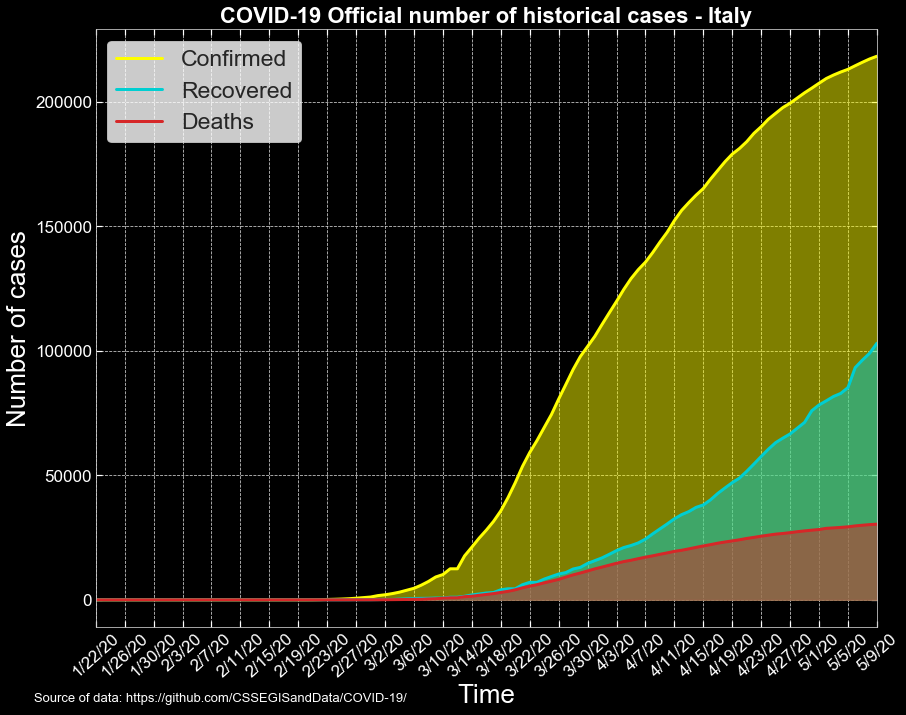

In [23]:
plot_region(region='Italy', mode='full')

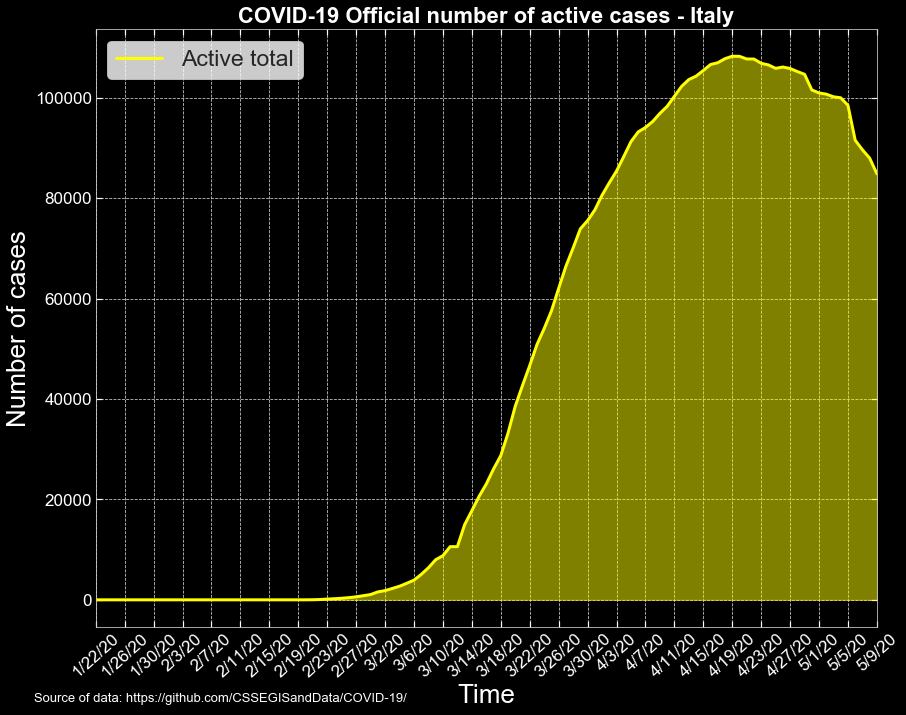

In [24]:
plot_region(region='Italy', mode='total')

### Spain

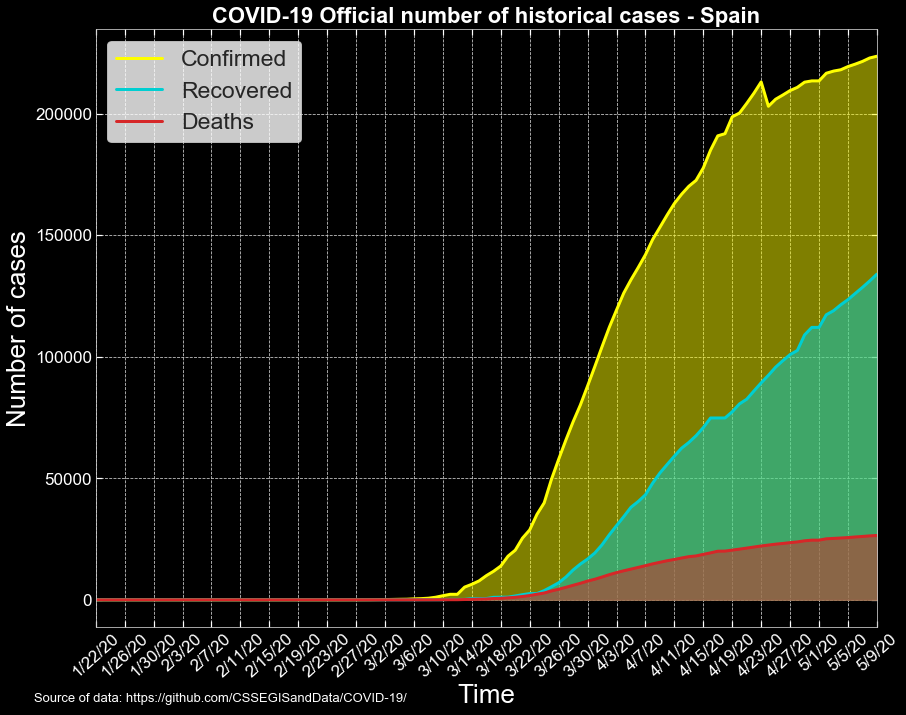

In [25]:
plot_region(region='Spain', mode='full')

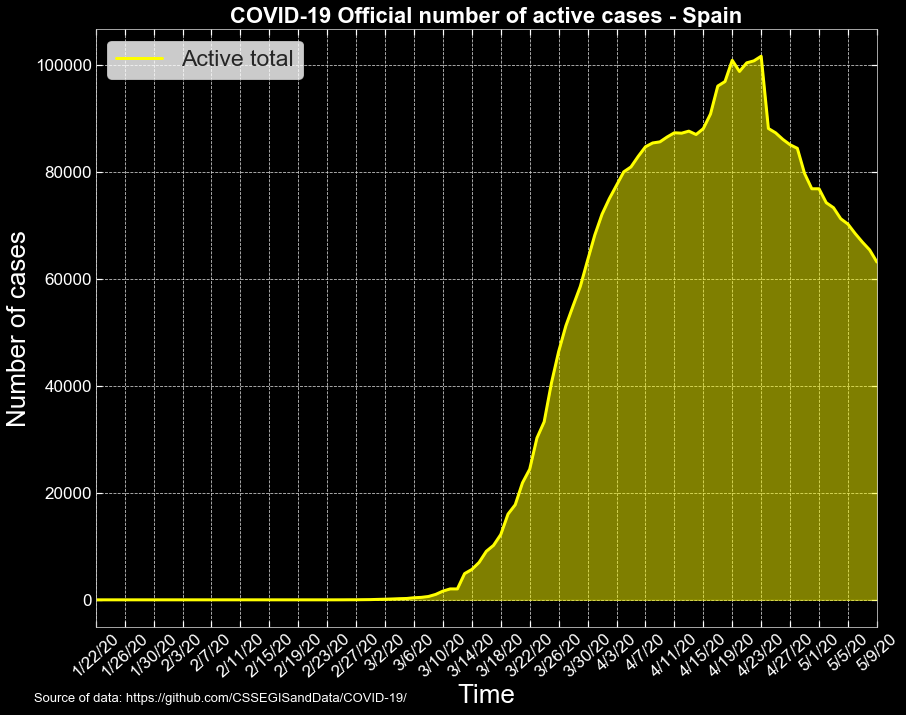

In [26]:
plot_region(region='Spain', mode='total')

### France

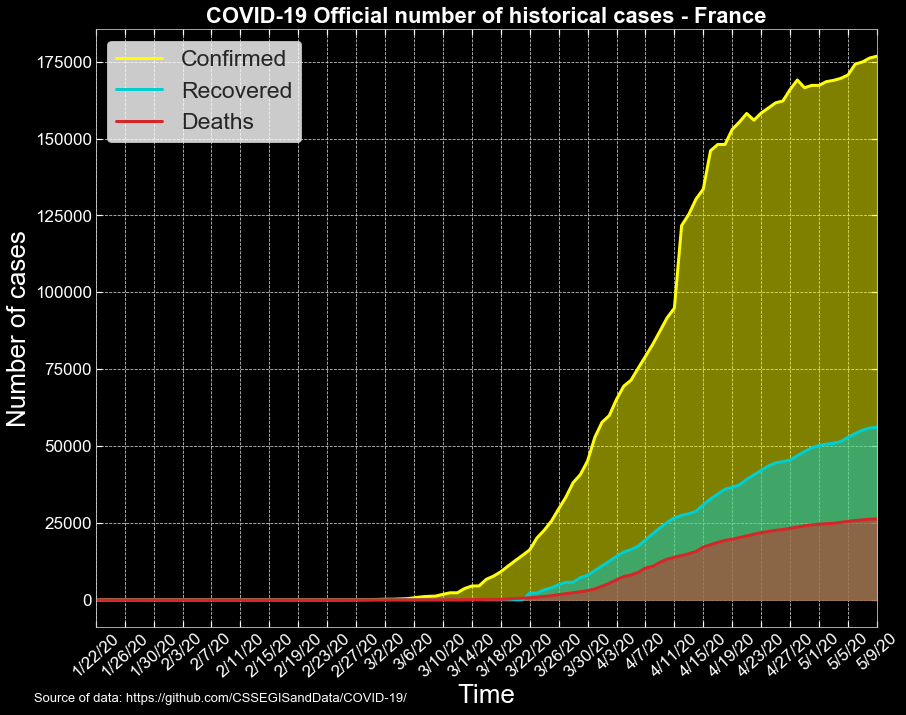

In [27]:
plot_region(region='France', mode='full')

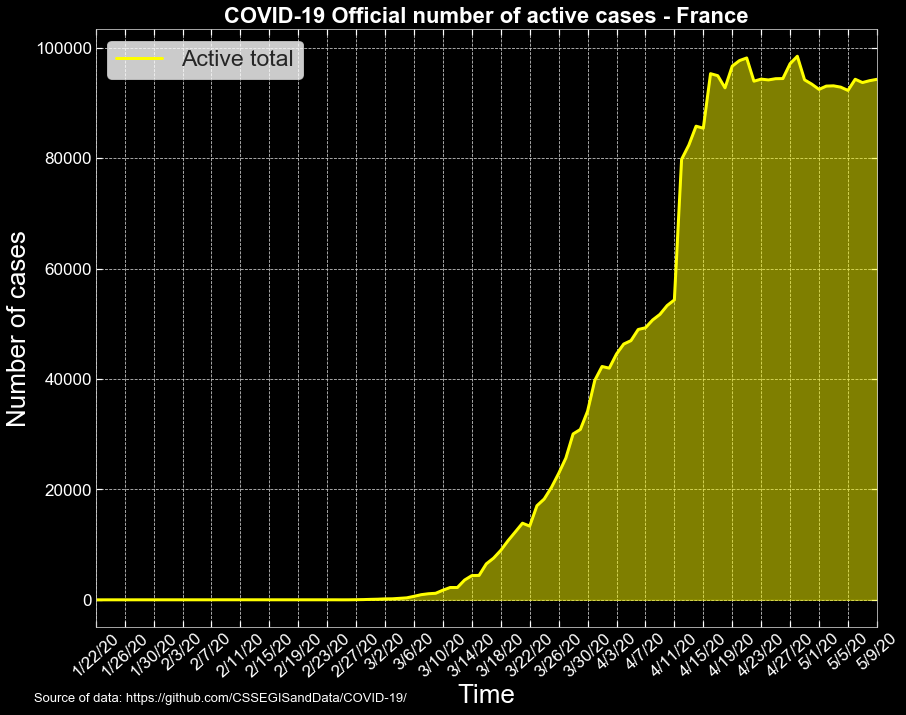

In [28]:
plot_region(region='France', mode='total')

### Germany

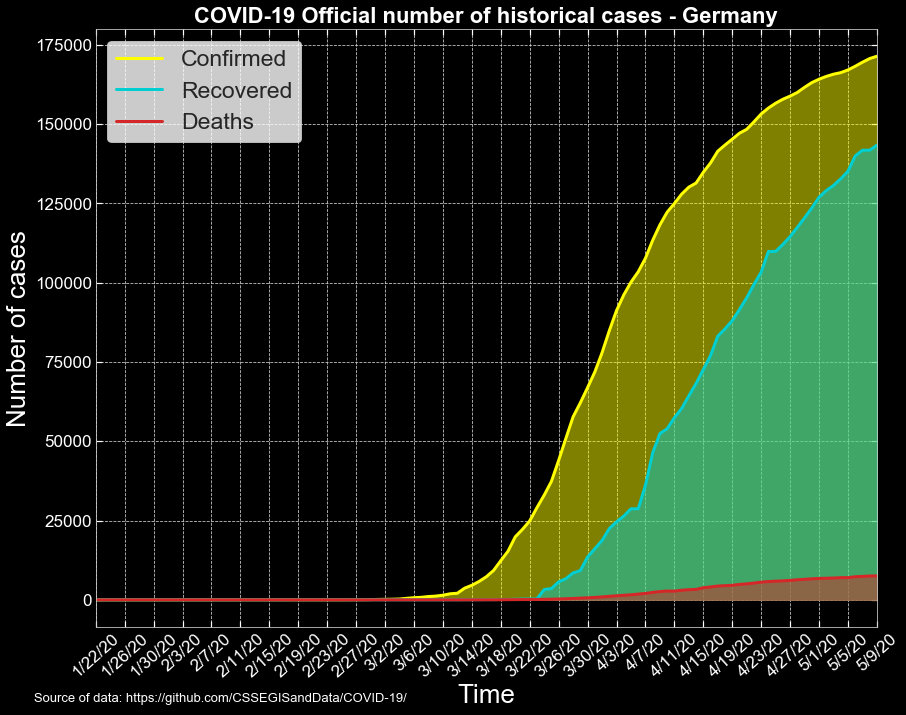

In [29]:
plot_region(region='Germany', mode='full')

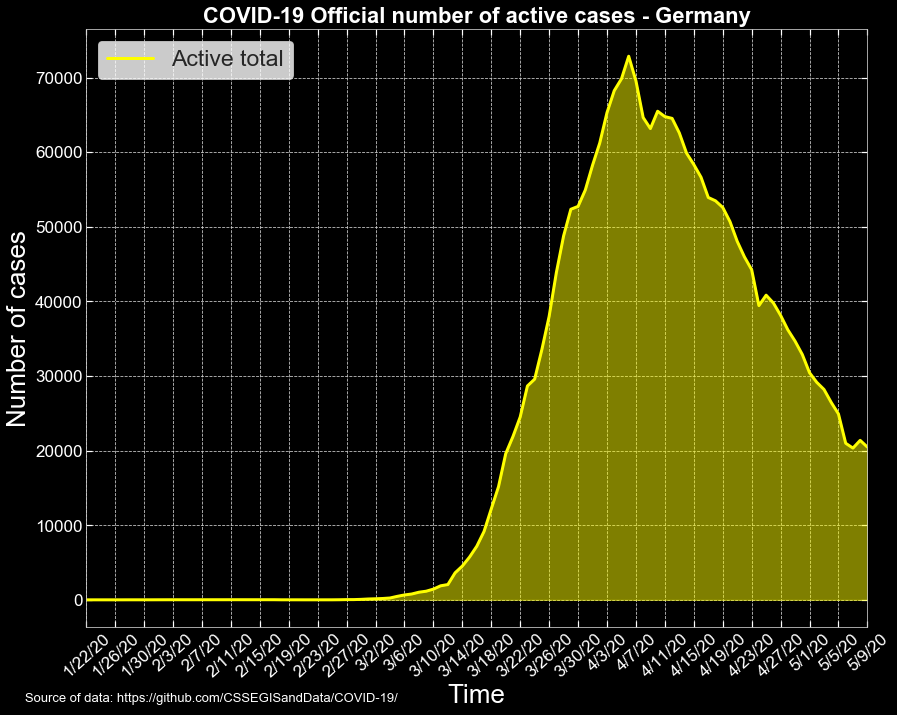

In [30]:
plot_region(region='Germany', mode='total')

### Switzerland

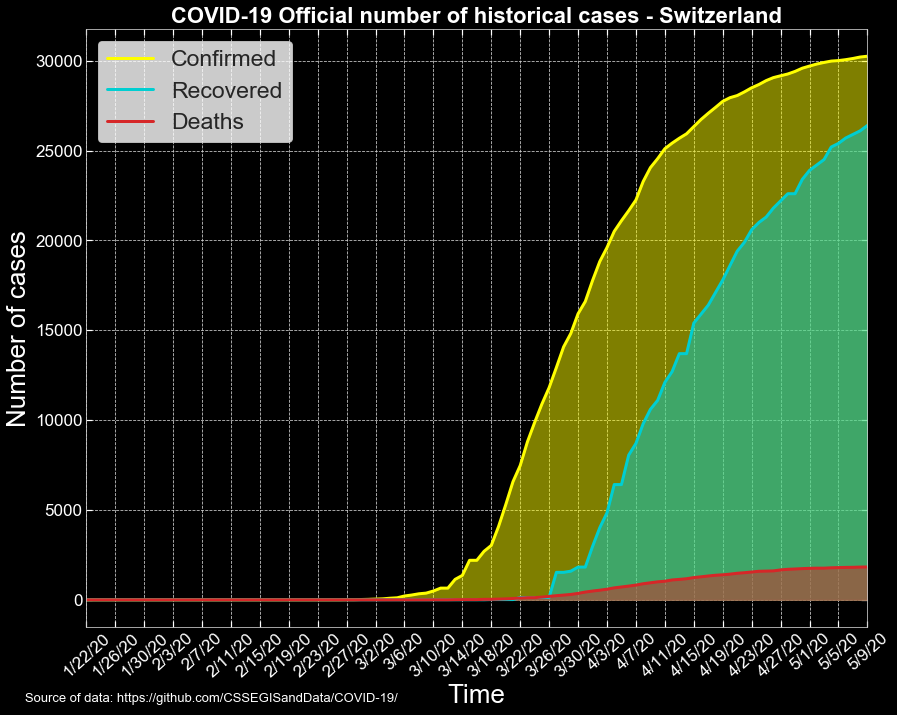

In [31]:
plot_region(region='Switzerland', mode='full')

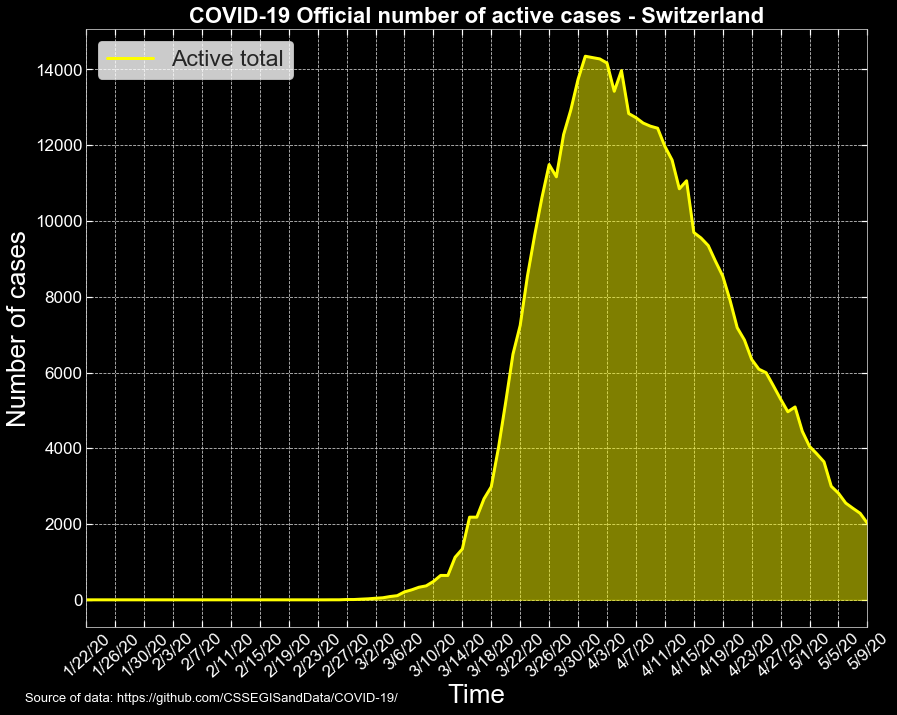

In [32]:
plot_region(region='Switzerland', mode='total')

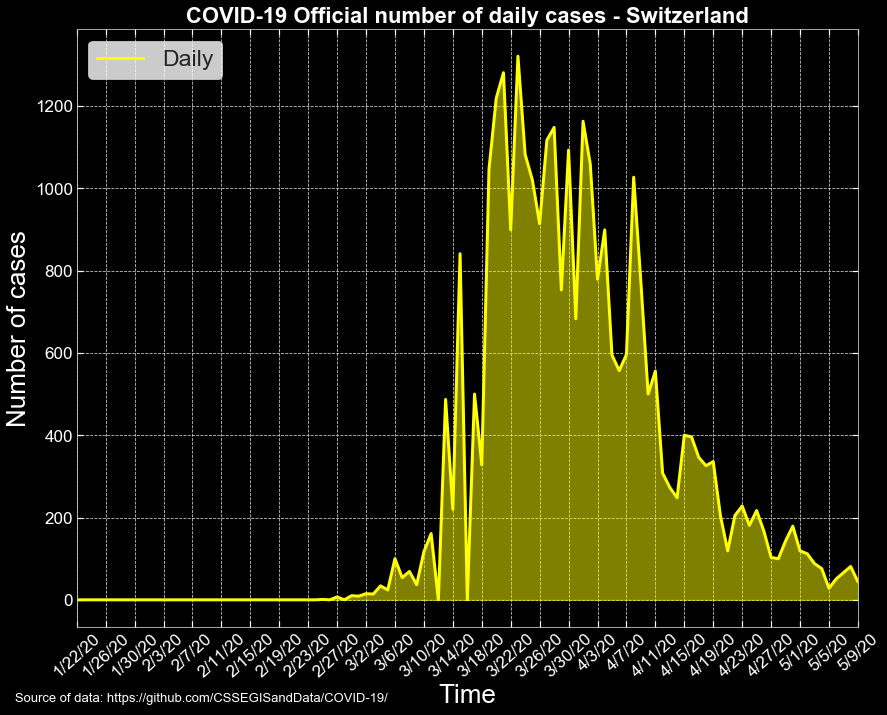

In [33]:
plot_region(region='Switzerland', mode='daily')

### India

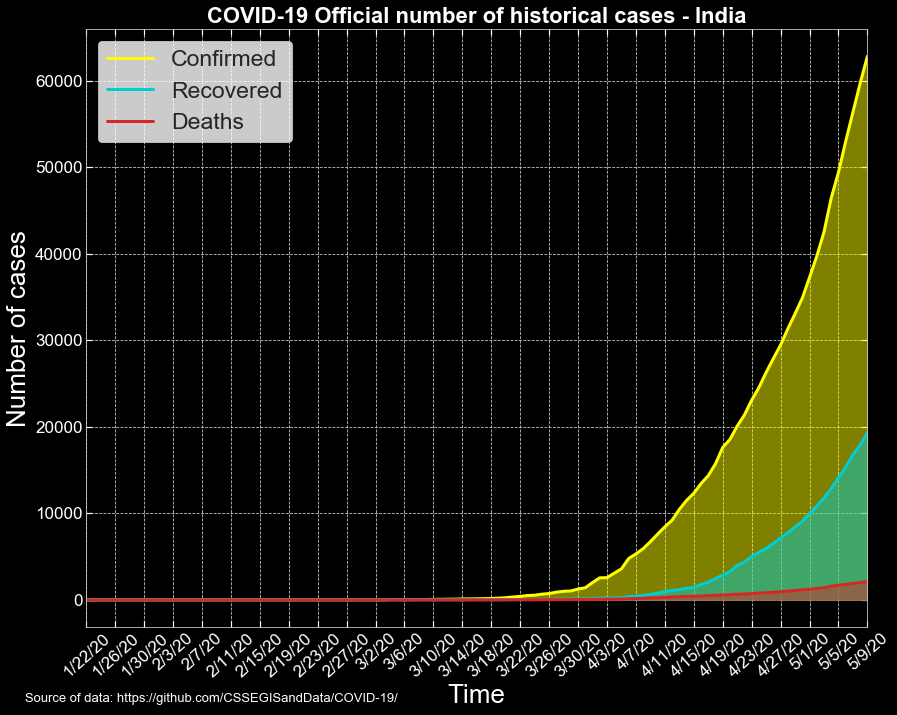

In [34]:
plot_region(region='India', mode='full')

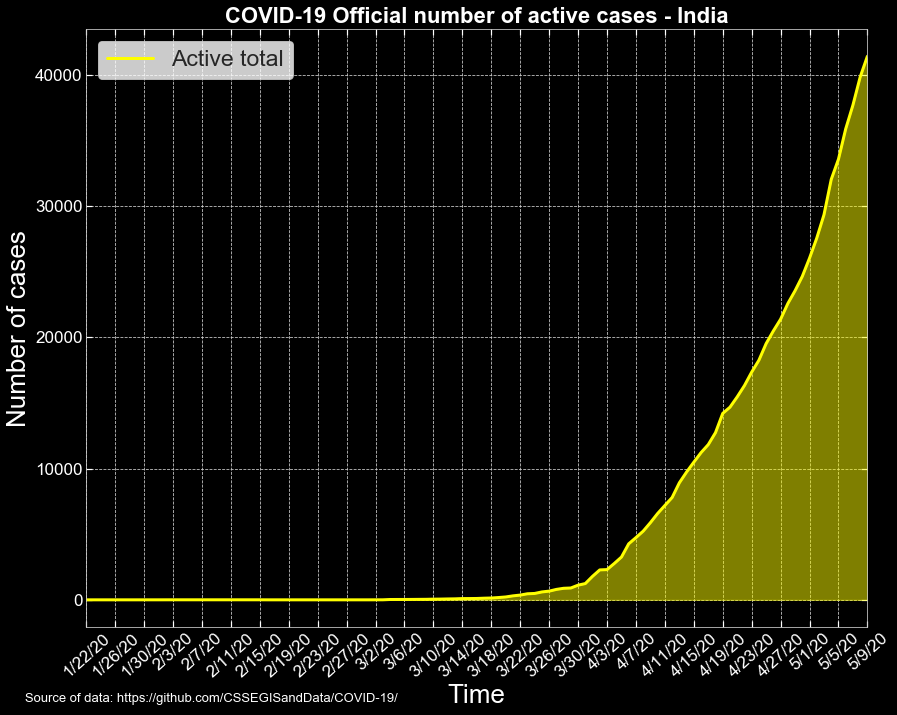

In [35]:
plot_region(region='India', mode='total')

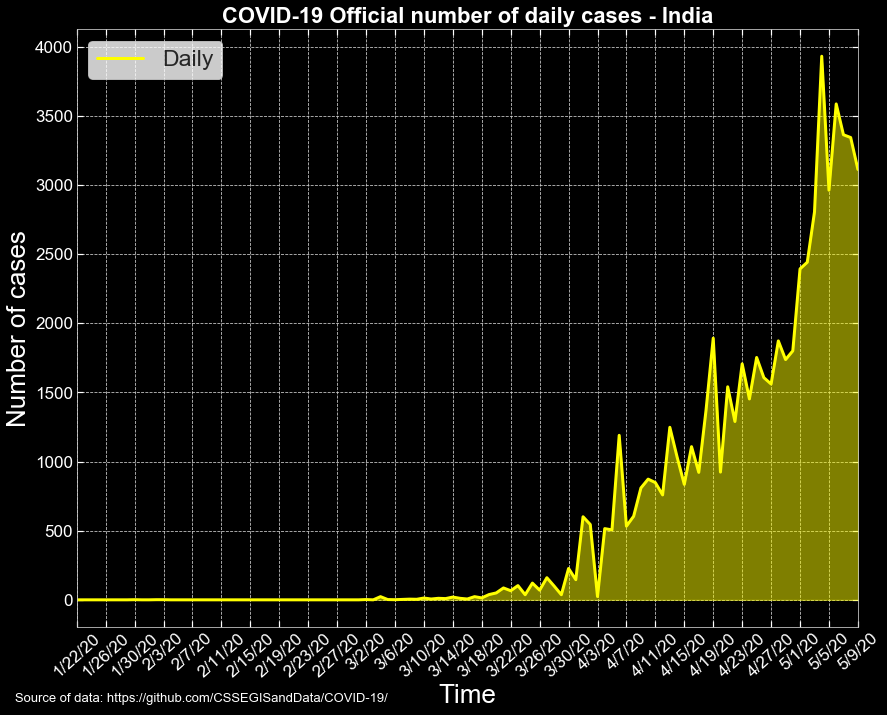

In [36]:
plot_region(region='India', mode='daily')

### Hungary

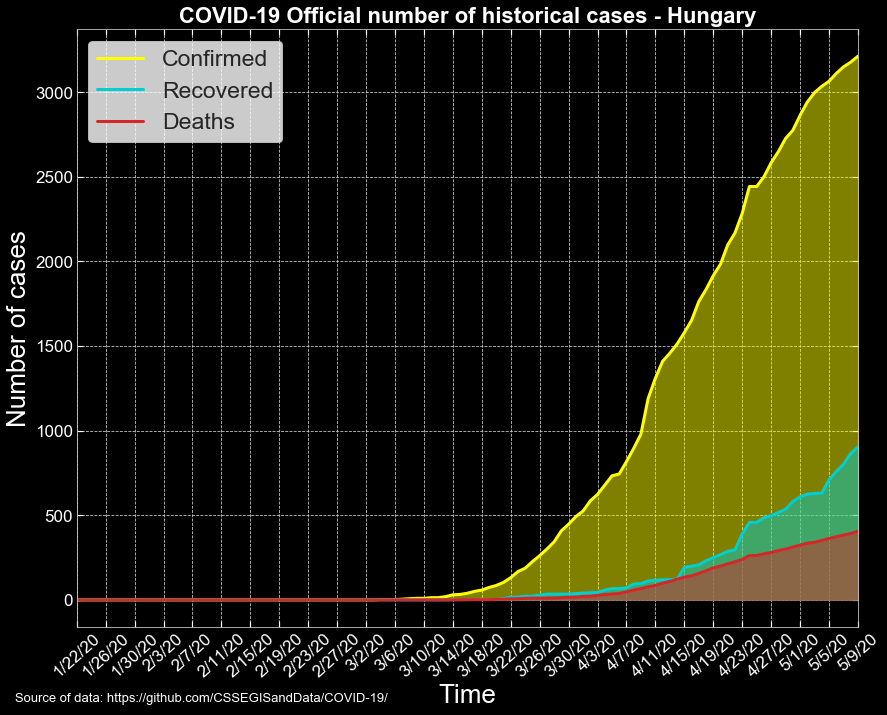

In [37]:
plot_region(region='Hungary', mode='full')

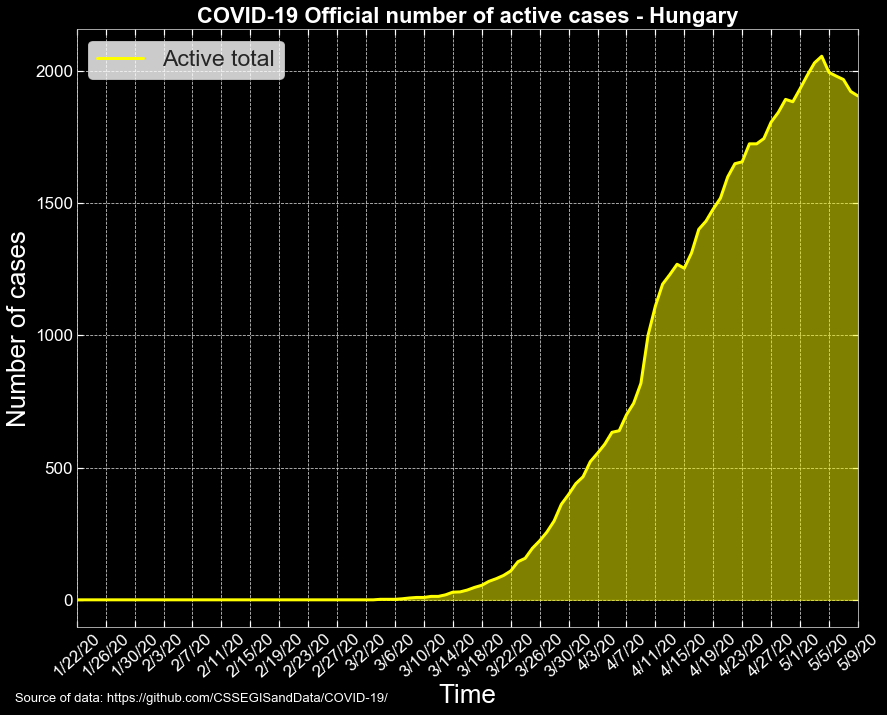

In [38]:
plot_region(region='Hungary', mode='total')

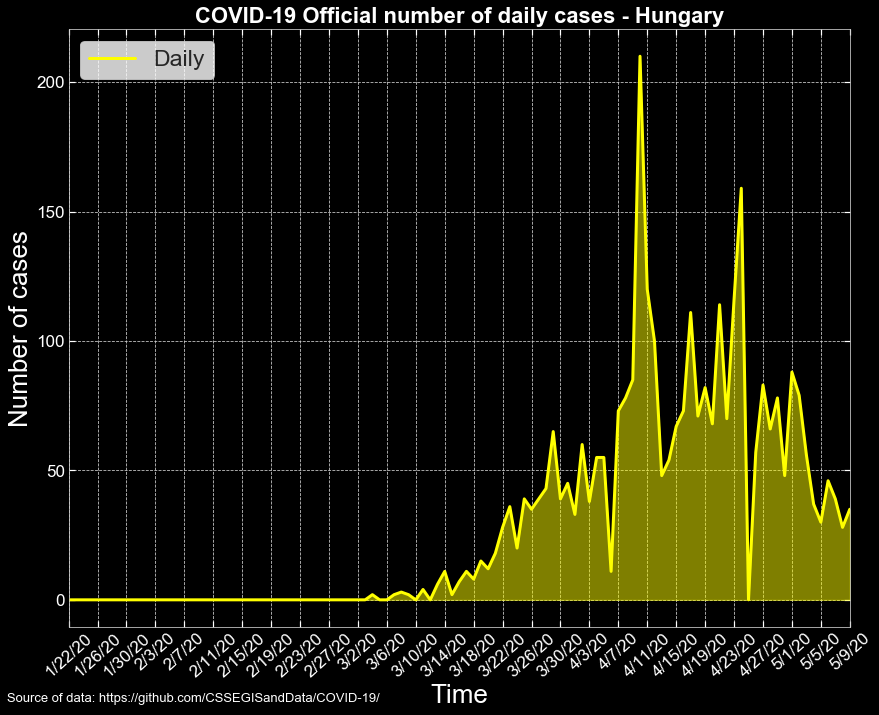

In [39]:
plot_region(region='Hungary', mode='daily')

### Austria

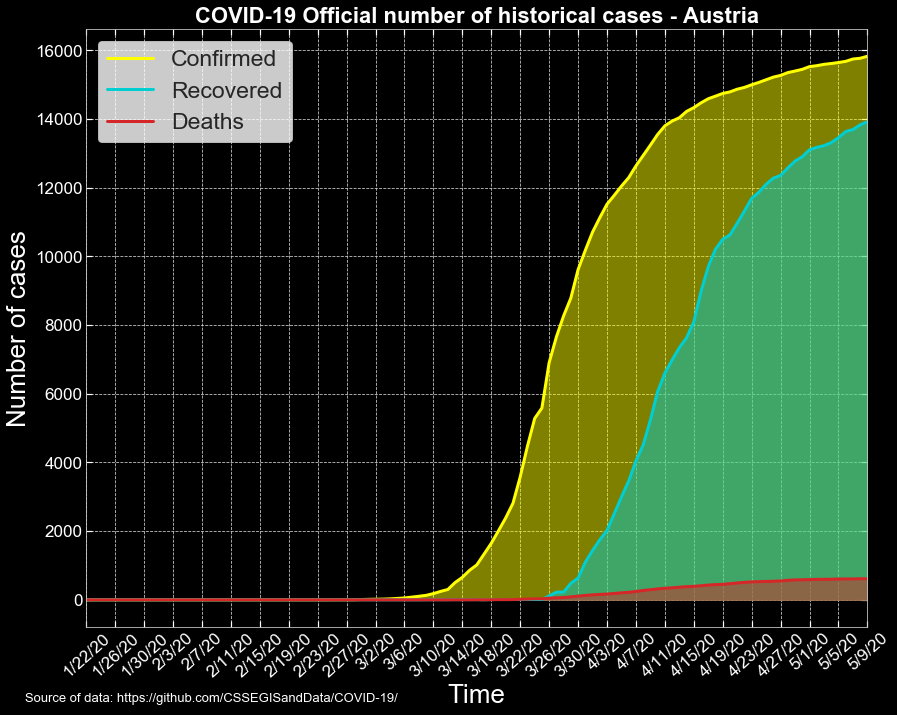

In [40]:
plot_region(region='Austria', mode='full')

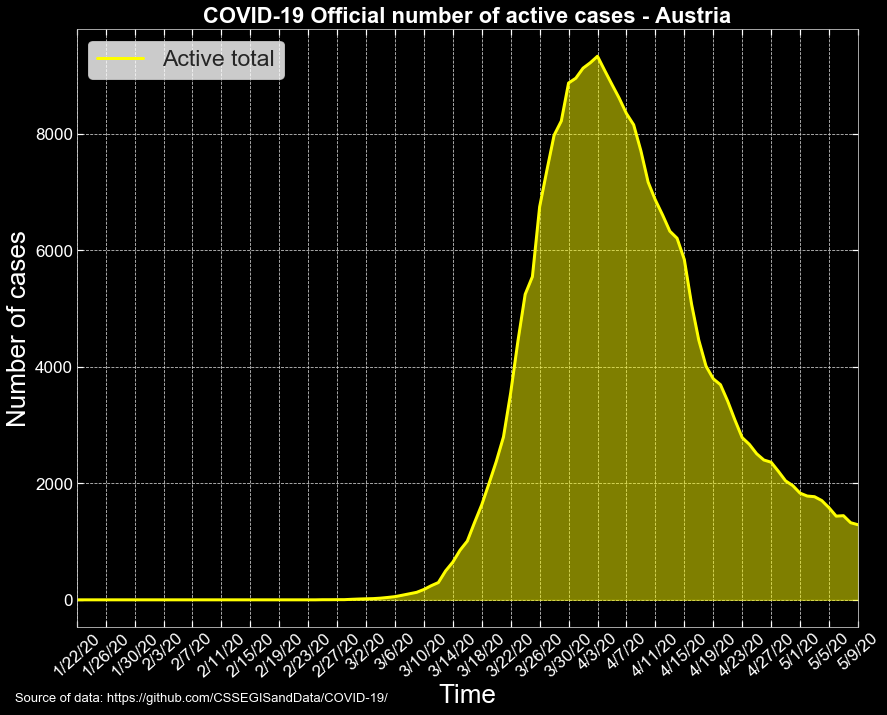

In [41]:
plot_region(region='Austria', mode='total')

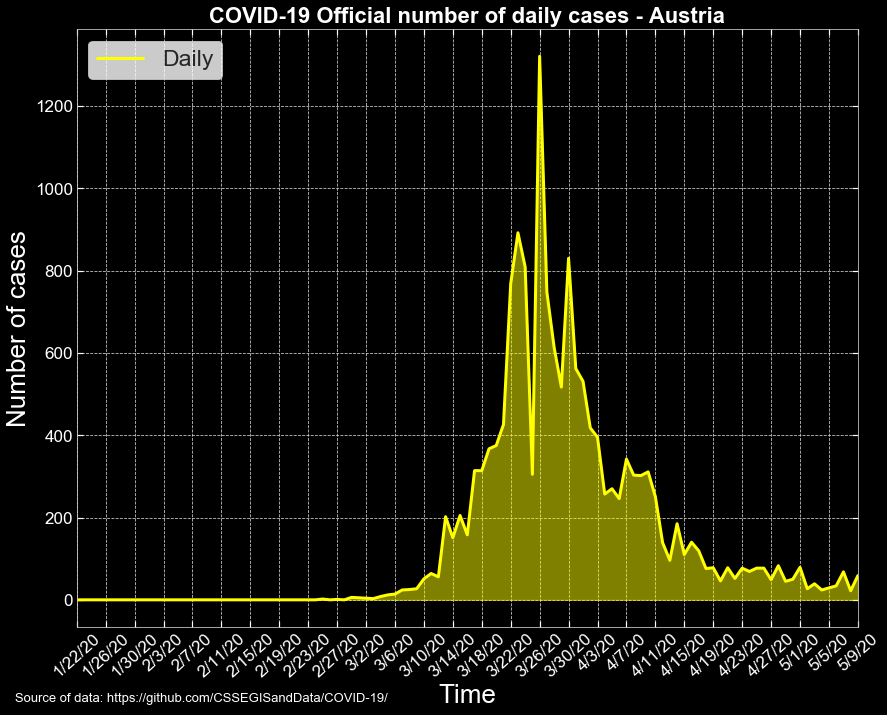

In [42]:
plot_region(region='Austria', mode='daily')

## Simple extrapolation using logistic fitting

In [43]:
from scipy.optimize import curve_fit

### Logistic curve fitting on available data

In [44]:
def logistic_p0(X, Y): 
    
    L = np.max(Y)
    k = 1
    x_0 = np.median(X)
    y_0 = np.min(Y)
    
    return [L, k, x_0, y_0]

In [45]:
def logistic(X, L, k, x_0, y_0):
    
    return L / (1 + np.exp(-k * (X - x_0))) + y_0

In [46]:
def pred_region(region):

    N = len(dates)
    X = np.linspace(0, N-1, N)
    Y = region_cases.loc[region]

    p0 = logistic_p0(X, Y)
    popt, pcov = curve_fit(logistic, X, Y, p0)
    
    return popt, pcov

In [47]:
def pred_all():
    
    N = len(dates)
    X = np.linspace(0, N-1, N)
    Y = sum_cases_adj

    p0 = logistic_p0(X, Y)
    popt, pcov = curve_fit(logistic, X, Y, p0)
    
    return popt, pcov

### Plotting prediction using fitted curve

In [48]:
def add_days(dates, add):
    last_date = dates[-1].split('/')
    current = datetime.datetime(int('20' + last_date[2]), int(last_date[0]), int(last_date[1]))
    
    raw_dates = [current + datetime.timedelta(days=d) for d in range(1, add+1)]
    form_dates = [str(date.month) + '/' + str(date.day) + '/' + str(date.year)[2:] for date in raw_dates]
    pred_dates = np.append(dates, form_dates)
    
    return pred_dates

In [49]:
def plot_pred_all(popt, pred_N=1.4):
    
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                             facecolor='black', subplot_kw=dict(facecolor='black'))
    
    # Current data
    cases_color = 'yellow'
    axes.plot(dates, sum_cases_adj, label='Confirmed',
              c=cases_color, lw=3)
    # Mark last real datapoint
    axes.axvline(x=dates[-1], c=cases_color, lw=2, ls='--')
    
    # Predicted data
    N = len(dates)
    pred_dates = add_days(dates, add=int(np.round(N*pred_N)) - N)
    pred_X = np.linspace(0, int(np.round(pred_N*(N-1))), int(np.round(pred_N*N)))
    axes.plot(pred_dates, logistic(pred_X, *popt), label='Logistic prediction',
              c='tab:red', lw=4, alpha=0.7)

    axes.set_title('COVID-19 Predicted number of cases', 
                   fontsize=axistitlesize, fontweight='bold', color='white')
    
    # Source text
    axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
              c='white', fontsize=13, fontweight='book',
              horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
              bbox=dict(facecolor='black', alpha=0.2, lw=0))

    axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
    axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

    axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    axes.set_xticks(pred_dates[::int(np.round(pred_N))*date_jump])
    axes.set_xticklabels(pred_dates[::int(np.round(pred_N))*date_jump], rotation=42, ha='center')

    # Should be placed after setting x-ticks!!!
    axes.set_xlim(pred_dates[0], pred_dates[-1])

    axes.legend(loc='upper left', fontsize=axislegendsize)

    plt.show()

In [50]:
def plot_pred_region(region, popt, pred_N=1.4):
    
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*11),
                             facecolor='black', subplot_kw=dict(facecolor='black'))
    
    # Current data
    cases_color = 'yellow'
    axes.plot(dates, region_cases.loc[region], label='Confirmed',
              c=cases_color, lw=3)
    # Mark last real datapoint
    axes.axvline(x=dates[-1], c=cases_color, lw=2, ls='--')
    
    # Predicted data
    N = len(dates)
    pred_dates = add_days(dates, add=int(np.round(N*pred_N)) - N)
    pred_X = np.linspace(0, int(np.round(pred_N*(N-1))), int(np.round(pred_N*N)))
    axes.plot(pred_dates, logistic(pred_X, *popt), label='Logistic prediction',
              c='tab:red', lw=4, alpha=0.7)

    axes.set_title('COVID-19 Predicted number of cases - {}'.format(region), 
                   fontsize=axistitlesize, fontweight='bold', color='white')
    
    # Source text
    axes.text(x=0.16, y=-0.12, s='Source of data: https://github.com/CSSEGISandData/COVID-19/',
              c='white', fontsize=13, fontweight='book',
              horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
              bbox=dict(facecolor='black', alpha=0.2, lw=0))

    axes.set_xlabel('Time', fontsize=axislabelsize, color='white')
    axes.set_ylabel('Number of cases', fontsize=axislabelsize, color='white')

    axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    axes.set_xticks(pred_dates[::int(np.round(pred_N))*date_jump])
    axes.set_xticklabels(pred_dates[::int(np.round(pred_N))*date_jump], rotation=42, ha='center')

    # Should be placed after setting x-ticks!!!
    axes.set_xlim(pred_dates[0], pred_dates[-1])

    axes.legend(loc='upper left', fontsize=axislegendsize)

    plt.show()

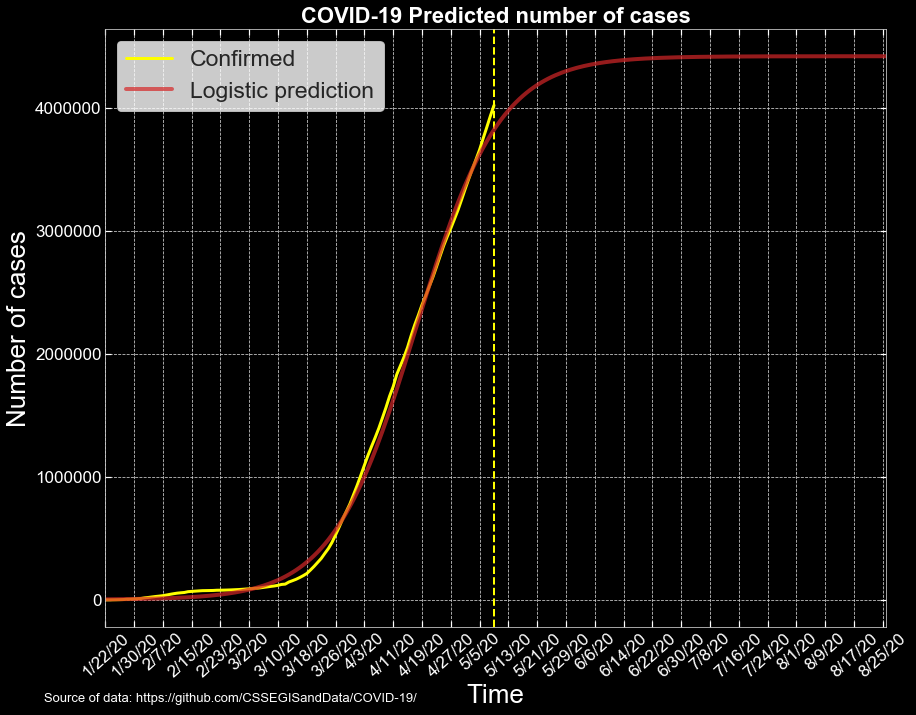

In [51]:
popt, pcov = pred_all()
plot_pred_all(popt, pred_N=2)

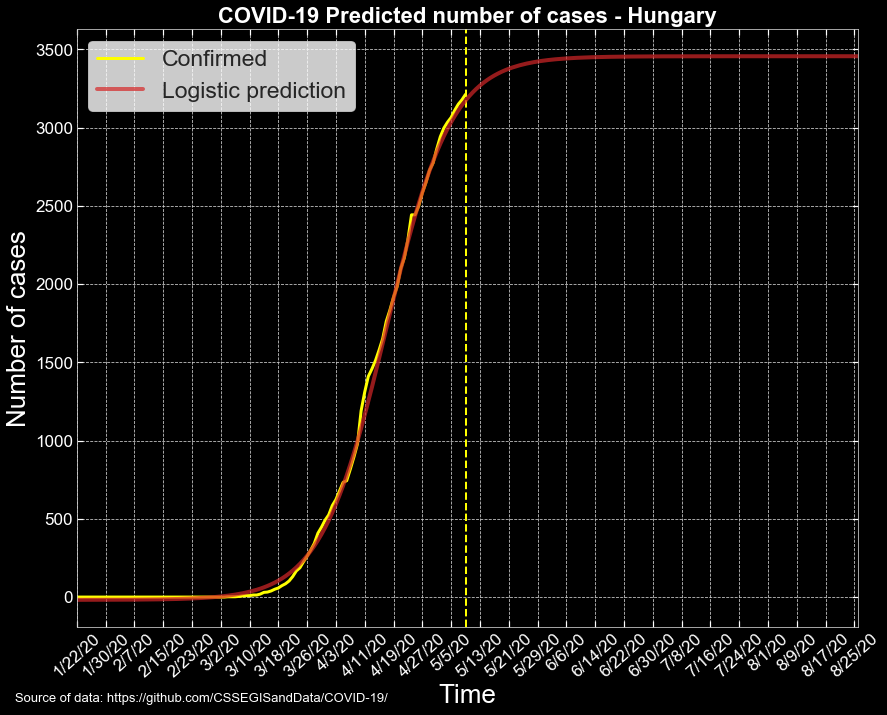

In [52]:
region = 'Hungary'
popt, pcov = pred_region(region)
plot_pred_region(region, popt, pred_N=2)